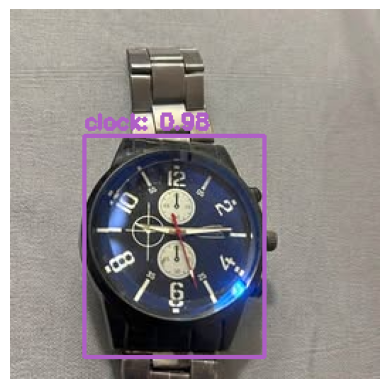

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO
cfg_file = 'yolov3.cfg'
weight_file = 'yolov3.weights'
namesfile = 'coco.names'
net = cv2.dnn.readNet(weight_file, cfg_file)

with open(namesfile, 'r') as f:
    classes = f.read().strip().split('\n')

# Load image (no / in front)
image_path = 'watch.jpg'
image = cv2.imread(image_path)

# Safety check
if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

height, width = image.shape[:2]

# Preprocess
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
layer_names = net.getUnconnectedOutLayersNames()
outs = net.forward(layer_names)

# Extract detections
class_ids, confidences, boxes = [], [], []
conf_threshold = 0.5
nms_threshold = 0.4

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype('int')
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Max Suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# Draw boxes
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    color = np.random.randint(0, 255, size=3).tolist()
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
